In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/startup_growth_investment_data.csv")

In [4]:
df.head()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


In [5]:
print("Initial dataset shape:", df.shape)
df.drop_duplicates(inplace=True)  # Remove duplicate rows
df.dropna(inplace=True)  # Remove missing values
print("After cleaning, dataset shape:", df.shape)

Initial dataset shape: (5000, 9)
After cleaning, dataset shape: (5000, 9)


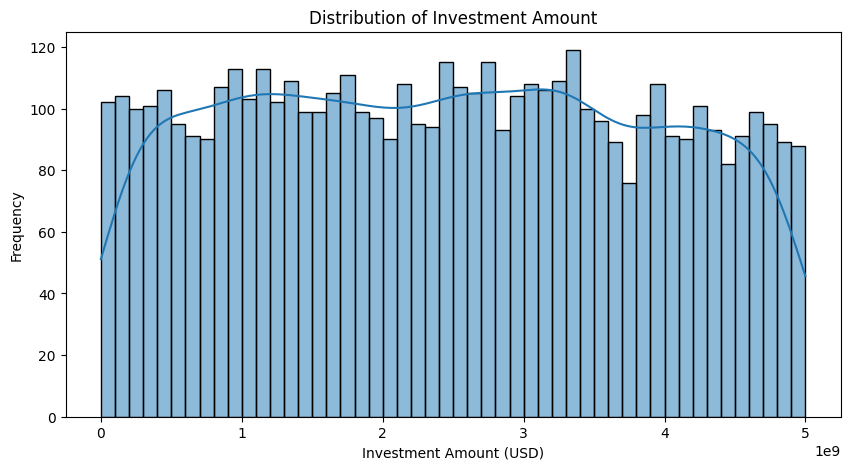

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Investment Amount (USD)'], bins=50, kde=True)
plt.title("Distribution of Investment Amount")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Frequency")
plt.show()

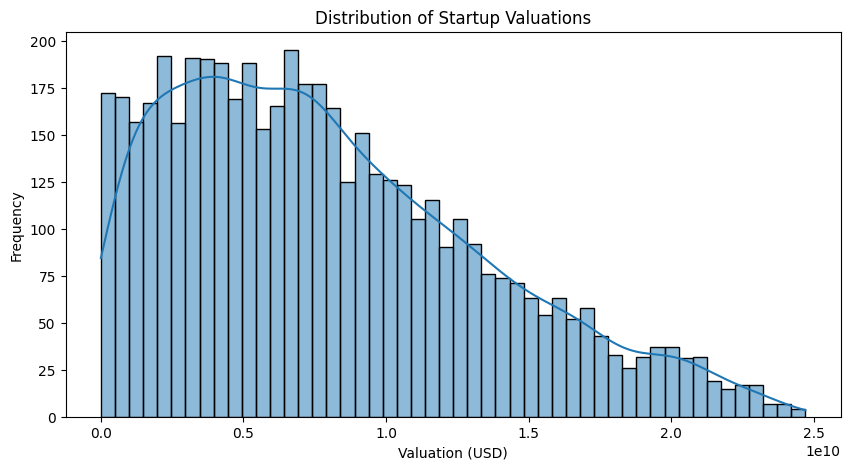

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Valuation (USD)'], bins=50, kde=True)
plt.title("Distribution of Startup Valuations")
plt.xlabel("Valuation (USD)")
plt.ylabel("Frequency")
plt.show()

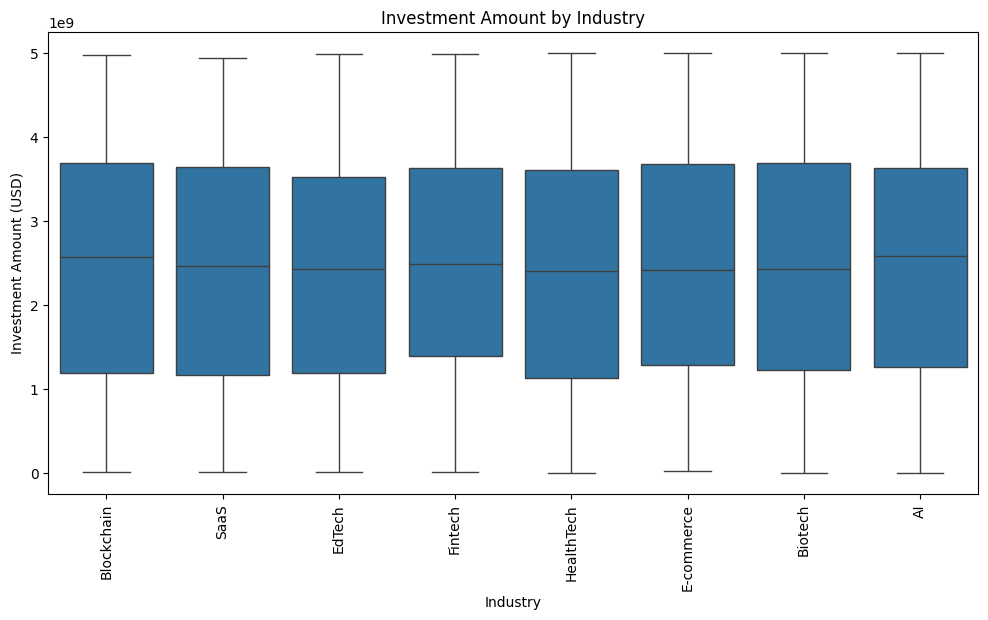

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Investment Amount (USD)', data=df)
plt.xticks(rotation=90)
plt.title("Investment Amount by Industry")
plt.show()

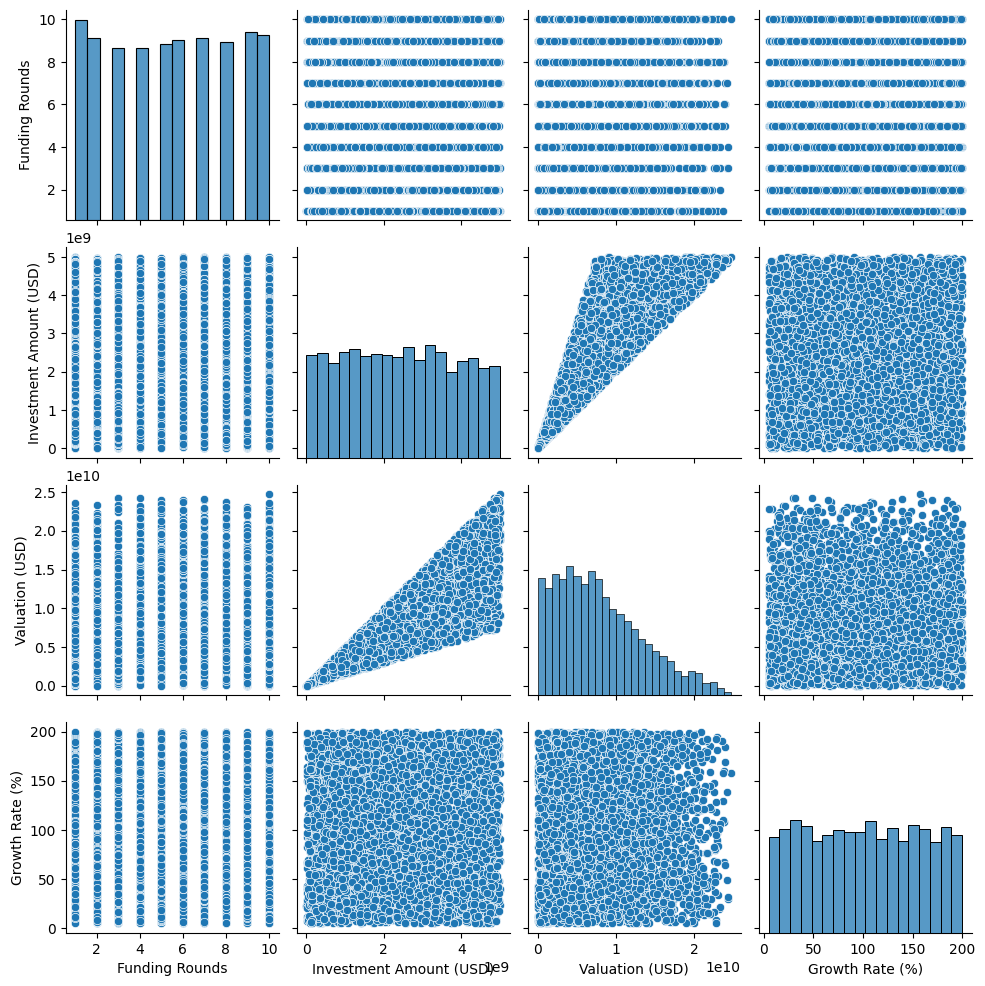

In [9]:
sns.pairplot(df[['Funding Rounds', 'Investment Amount (USD)', 'Valuation (USD)', 'Growth Rate (%)']])
plt.show()

In [10]:
# Convert categorical data to numerical
df = pd.get_dummies(df, columns=['Industry', 'Country'], drop_first=True)

In [11]:
X = df.drop(columns=['Startup Name', 'Valuation (USD)'])  # Independent variables
y = df['Valuation (USD)']  # Target variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMAE: {mae}\nRMSE: {rmse}\nR2 Score: {r2}")

Model Performance:
MAE: 2232639908.186832
RMSE: 2989852613.3760066
R2 Score: 0.6910329018383068


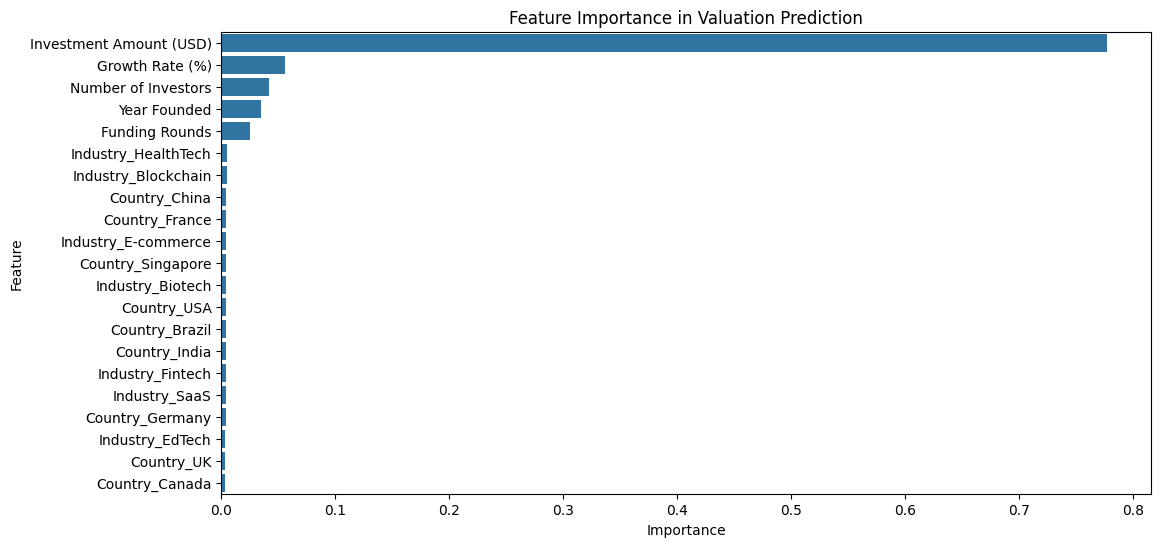

In [17]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Valuation Prediction")
plt.show()
